In [1]:
import pandas as pd
import numpy as np


# 设置打印最大行
pd.set_option('display.max_columns', 20)


# 导入数据
dataset_path = "./2019data.xlsx"
column_names = ['data', 'volume', 'CODi', 'BODi', 'SSi', 'NH3-Ni', 
                'TPi', 'TNi', 'CODe', 'BODe', 'SSe', 'NH3Ne', 'TPe',
                'TNe', 'T', 'rain']
rawdata = pd.read_excel(dataset_path, names=column_names)


# 将降雨中的空值转化为0
rawdata = rawdata.replace(np.NaN, 0)
# data = data.fillna(0)


# 删除相关性较差列数据及时间列
del rawdata['data']
del rawdata['BODi']
del rawdata['BODe']
del rawdata['rain']


# 将总氮数据提出来
TNe = rawdata.pop('TNe')


# 输入指标归一化
rawdata_stats = rawdata.describe()
train_stats = rawdata_stats.transpose()
train_stats
'''
    train_stats里面没有总氮数据，五个输入后缀为i，四个输出后缀为e，365天数据
''';

In [2]:
def norm(x):
    return (x - train_stats['mean'])/train_stats['std']


# 归一化 可以用np函数，待修
rawdata_norm = norm(rawdata)


# 整理成RNN输入数据形式
datanum = 300  # 使用数据组数////////////////////////////////////////////////////////////////////////////////////////
lookback = 5  # 设置输入变量涵盖天数///////////////////////////////////////////////////////////////////////////////
paranum = 11  # 设置输入变量的指标个数//////////////////////////////////////////////////////////////////////////////
data = pd.DataFrame(columns=['input', 'TNe'])  # 建立新的数据矩阵
parastr = ['volume', 'CODi', 'SSi', 'NH3-Ni', 'TPi', 'TNi', 'CODe', 'SSe', 'NH3Ne', 'TPe', 'T']


# 可以简化，列表生成器
for i in range(datanum):
    Inputlist = []
    for j in range(lookback):
        inputlist = []
        for k in range(paranum):
            # inputlist为一天数据，11 para的顺序
            inputlist.append(rawdata_norm.loc[i+j][parastr[k]])
        # Inputlist为五天数据
        Inputlist.append(inputlist)
    # 每一行为五天数据向量，输出为五天后总氮输出
    data.loc[i] = [Inputlist, TNe[i+lookback]]

# 300 rows x 2 cols
data

,input,TNe
0,"[[0.30031852048560087, -0.17806441681418544, 0...",10.70
1,"[[0.20807792529663297, 0.171670752694157, 0.27...",8.89
2,"[[-0.09723305059198947, -0.7503583305551095, -...",8.95
3,"[[-0.0062510990020931126, -0.9623190393480442,...",9.07
4,"[[0.2875522782664631, 0.6273862765989668, -0.4...",9.37
5,"[[0.22938496336660016, 0.09748450461662982, 0....",9.01
6,"[[0.0930019390959739, -0.5383976217621746, -0....",8.34
7,"[[0.1306713439538475, -1.6299952720457889, -1....",9.11
8,"[[0.08553998061577633, 0.06569039829768959, -0...",9.41
9,"[[0.23028399450879072, -0.3264369129692398, 0....",9.03


In [3]:
# 分割训练数据和测试数据
fraction = 0.8  # 定义训练集、测试集切割比例//////////////////////////////////////////////////////////////////////////
train_data = data.sample(frac=fraction)  # frac=0.8 means train data possess 80% of all
# print(len(train_data))
test_data = data.drop(train_data.index)
# print(len(test_data))
# 生成训练数据和测试数据，训练数据是240*5*7的数组  x7???
trainnum = int(datanum * fraction)
testnum = datanum - trainnum
# traindata(240,5,11)
traindata = np.zeros((trainnum, lookback, paranum))
# testdata(60,5,11)
testdata = np.zeros((testnum, lookback, paranum))

display(train_data)
display(test_data)
display(test_data.shape)

,input,TNe
43,"[[-0.34824254549217637, -0.28404477121065286, ...",8.32
127,"[[-1.3186567603749222, 0.21406289445274396, -0...",9.28
276,"[[1.1586235519369212, -1.3120542088563867, -1....",9.72
281,"[[0.07933666573464555, -0.35823101928818, -0.5...",7.46
135,"[[-0.26112642781370893, 2.217091592545978, 1.5...",9.30
145,"[[-0.6888854452689706, 0.7651607373143745, 0.6...",9.28
227,"[[0.7202559670037856, 0.36243539060779834, -0....",7.75
225,"[[0.6290043060712304, 0.659180382917907, 0.744...",8.40
72,"[[0.6351177178381422, 0.7333666309954342, 0.31...",9.23
146,"[[0.35183300493323777, -1.0259072519859247, -0...",8.02


,input,TNe
1,"[[0.20807792529663297, 0.171670752694157, 0.27...",8.89
6,"[[0.0930019390959739, -0.5383976217621746, -0....",8.34
11,"[[0.1588110187044757, -1.4498286695717943, -1....",8.76
13,"[[0.4248343336792799, -0.9941131456669845, -0....",7.88
19,"[[-1.5009802760115911, 1.0513076941848365, 1.8...",8.42
28,"[[-2.200876020208567, 1.9415426711151627, 1.88...",7.24
33,"[[-1.984209514940139, 1.030111623305543, 0.364...",7.36
37,"[[-3.9219812388221733, -0.114476204176305, 1.1...",9.26
39,"[[-1.0214370647660322, 1.273866438417418, 1.77...",7.75
40,"[[-0.6111192514693072, -0.3264369129692398, -0...",8.95


(60, 2)

In [4]:
for i in range(trainnum):
    for j in range(lookback):
        for k in range(paranum):
            traindata[i][j][k] = train_data.iloc[i, 0][j][k]
for i in range(testnum):
    for j in range(lookback):
        for k in range(paranum):
            testdata[i][j][k] = test_data.iloc[i, 0][j][k]

# (240,5,11)
display(traindata.shape)
# (60,5,11)
display(testdata.shape)

(240, 5, 11)

(60, 5, 11)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 5, 32)             4224      
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 10,497
Trainable params: 10,497
Non-trainable params: 0
_________________________________________________________________
None
Train on 192 samples, validate on 48 samples
Epoch 1/400
192/192 [==============================] - 3s 14ms/step - loss: 9.0525 - val_loss: 6.2835
Epoch 2/400
192/192 [==============================] - 0s 291us/step - loss: 5.9802 - val_loss: 4.8647
Epoch 3/400
192/192 [==============================] - 0s 197us/step - loss: 4.6994 - val_loss: 4.0828
Epoch 4/400
192/192 [=======================

192/192 [==============================] - 0s 327us/step - loss: 0.5990 - val_loss: 0.7593
Epoch 73/400
192/192 [==============================] - 0s 348us/step - loss: 0.5883 - val_loss: 0.7705
Epoch 74/400
192/192 [==============================] - 0s 213us/step - loss: 0.5977 - val_loss: 0.8452
Epoch 75/400
192/192 [==============================] - 0s 275us/step - loss: 0.7238 - val_loss: 0.7611
Epoch 76/400
192/192 [==============================] - 0s 322us/step - loss: 0.6160 - val_loss: 0.7877
Epoch 77/400
192/192 [==============================] - 0s 291us/step - loss: 0.6750 - val_loss: 0.7585
Epoch 78/400
192/192 [==============================] - 0s 301us/step - loss: 0.5894 - val_loss: 0.7623
Epoch 79/400
192/192 [==============================] - 0s 213us/step - loss: 0.5796 - val_loss: 0.7556
Epoch 80/400
192/192 [==============================] - 0s 229us/step - loss: 0.5760 - val_loss: 0.7755
Epoch 81/400
192/192 [==============================] - 0s 213us/step - loss:

192/192 [==============================] - 0s 348us/step - loss: 0.4643 - val_loss: 0.7950
Epoch 151/400
192/192 [==============================] - 0s 296us/step - loss: 0.4273 - val_loss: 0.7937
Epoch 152/400
192/192 [==============================] - 0s 244us/step - loss: 0.4110 - val_loss: 0.7963
Epoch 153/400
192/192 [==============================] - 0s 203us/step - loss: 0.4740 - val_loss: 0.8179
Epoch 154/400
192/192 [==============================] - 0s 249us/step - loss: 0.4846 - val_loss: 0.7920
Epoch 155/400
192/192 [==============================] - 0s 286us/step - loss: 0.3956 - val_loss: 0.8010
Epoch 156/400
192/192 [==============================] - 0s 296us/step - loss: 0.4300 - val_loss: 0.8049
Epoch 157/400
192/192 [==============================] - 0s 410us/step - loss: 0.4253 - val_loss: 0.7987
Epoch 158/400
192/192 [==============================] - 0s 244us/step - loss: 0.3830 - val_loss: 0.8074
Epoch 159/400
192/192 [==============================] - 0s 234us/ste

Epoch 228/400
192/192 [==============================] - 0s 317us/step - loss: 0.2592 - val_loss: 0.8721
Epoch 229/400
192/192 [==============================] - 0s 260us/step - loss: 0.2665 - val_loss: 0.8853
Epoch 230/400
192/192 [==============================] - 0s 260us/step - loss: 0.2908 - val_loss: 0.8983
Epoch 231/400
192/192 [==============================] - 0s 239us/step - loss: 0.2701 - val_loss: 0.9060
Epoch 232/400
192/192 [==============================] - 0s 255us/step - loss: 0.3420 - val_loss: 0.8691
Epoch 233/400
192/192 [==============================] - 0s 301us/step - loss: 0.2801 - val_loss: 0.8572
Epoch 234/400
192/192 [==============================] - 0s 244us/step - loss: 0.2111 - val_loss: 0.8632
Epoch 235/400
192/192 [==============================] - 0s 260us/step - loss: 0.2281 - val_loss: 0.9091
Epoch 236/400
192/192 [==============================] - 0s 249us/step - loss: 0.3451 - val_loss: 0.9071
Epoch 237/400
192/192 [==============================] 

192/192 [==============================] - 0s 301us/step - loss: 0.1833 - val_loss: 0.9091
Epoch 306/400
192/192 [==============================] - 0s 353us/step - loss: 0.2741 - val_loss: 0.8900
Epoch 307/400
192/192 [==============================] - 0s 249us/step - loss: 0.2043 - val_loss: 0.8695
Epoch 308/400
192/192 [==============================] - 0s 322us/step - loss: 0.1581 - val_loss: 0.8552
Epoch 309/400
192/192 [==============================] - 0s 296us/step - loss: 0.2017 - val_loss: 0.8713
Epoch 310/400
192/192 [==============================] - 0s 203us/step - loss: 0.2818 - val_loss: 0.8699
Epoch 311/400
192/192 [==============================] - 0s 312us/step - loss: 0.2591 - val_loss: 0.8794
Epoch 312/400
192/192 [==============================] - 0s 338us/step - loss: 0.2485 - val_loss: 0.8597
Epoch 313/400
192/192 [==============================] - 0s 265us/step - loss: 0.1686 - val_loss: 0.8702
Epoch 314/400
192/192 [==============================] - 0s 286us/ste

Epoch 383/400
192/192 [==============================] - 0s 239us/step - loss: 0.2202 - val_loss: 0.8793
Epoch 384/400
192/192 [==============================] - 0s 192us/step - loss: 0.2185 - val_loss: 0.8711
Epoch 385/400
192/192 [==============================] - 0s 182us/step - loss: 0.1646 - val_loss: 0.8639
Epoch 386/400
192/192 [==============================] - 0s 192us/step - loss: 0.2134 - val_loss: 0.8810
Epoch 387/400
192/192 [==============================] - 0s 187us/step - loss: 0.2015 - val_loss: 0.9020
Epoch 388/400
192/192 [==============================] - 0s 197us/step - loss: 0.2241 - val_loss: 0.8565
Epoch 389/400
192/192 [==============================] - 0s 203us/step - loss: 0.1544 - val_loss: 0.8755
Epoch 390/400
192/192 [==============================] - 0s 192us/step - loss: 0.1801 - val_loss: 0.8889
Epoch 391/400
192/192 [==============================] - 0s 223us/step - loss: 0.2254 - val_loss: 0.8797
Epoch 392/400
192/192 [==============================] 

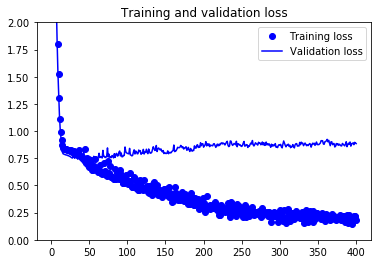

None

[7.953296  7.583283  7.1674175 7.7999873 8.357502  7.997974  7.5135245
 7.8425756 5.8924584 8.413972  6.5241113 8.422351  7.418862  8.594959
 7.6927943 7.6056476 7.054298  7.5506635 7.3031363 8.801967  7.482323
 8.320111  7.8984265 7.3256555 7.135776  7.618212  7.157327  7.108791
 9.318821  8.43226   9.550736  9.63168   9.449181  8.759922  9.577408
 9.52603   7.2637115 9.352066  9.374628  9.312719  9.41815   9.667887
 8.660526  8.630424  9.679849  7.940825  7.7559667 8.737958  8.311677
 8.886004  7.4819293 9.427154  7.855471  8.6615925 7.497446  7.4774156
 6.6797853 7.2972155 7.8483143 7.3048067]


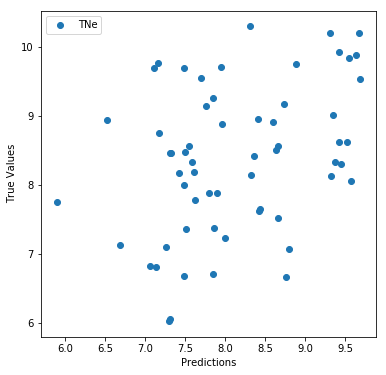

None

D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


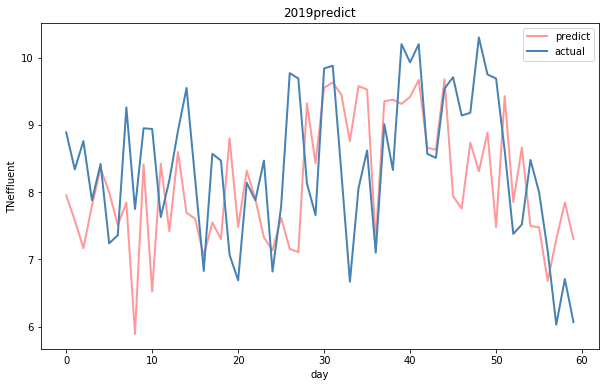

None

当前网络结构预测的TN出水MRE:0.1108105237756168
训练集的真值平均值为：8.378333333333332


'\n    当前网络结构预测的TN出水MRE:0.04312339966536906\n    训练集的真值平均值为：8.36679166666667\n'

In [6]:
# 搭建神经网络
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
from keras import regularizers
'''Simple RNN'''
# model.add(layers.SimpleRNN(32, input_shape=(lookback, paranum), activation='sigmoid'))
# model.add(layers.SimpleRNN(32, input_shape=(lookback, paranum), activation='sigmoid', dropout=0.2))
'''LSTM'''
# model.add(layers.LSTM(32, input_shape=(lookback, paranum), activation='sigmoid', dropout=0.2))
# model.add(layers.LSTM(32, input_shape=(lookback, paranum), activation='sigmoid'))
'''GRU'''
# model.add(layers.GRU(16, input_shape=(lookback, paranum), activation='sigmoid',
#                      kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.GRU(32, input_shape=(lookback, paranum), activation='sigmoid', dropout=0.2))
# model.add(layers.GRU(32, input_shape=(lookback, paranum), activation='sigmoid'))
'''带dropout用来削减过拟合的GRU'''
# model.add(layers.GRU(16,
#                      dropout=0.2,
#                      recurrent_dropout=0.2,
#                      input_shape=(lookback, paranum),
#                      activation='sigmoid'))
'''双层LSTM'''
# model.add(layers.LSTM(32, input_shape=(lookback, paranum), activation='sigmoid', return_sequences=True))
# model.add(layers.LSTM(32, activation='sigmoid'))
'''带dropout用来削减过拟合的双层GRU'''
# model.add(layers.GRU(32,
#                      dropout=0.1,
#                      activation='sigmoid',
#                      return_sequences=True,
#                      input_shape=(lookback, paranum)))
# model.add(layers.GRU(32, activation='sigmoid',
#                      dropout=0.1))
'''无dropout双层GRU'''
model.add(layers.GRU(32,
                     activation='sigmoid',
                     return_sequences=True,
                     input_shape=(lookback, paranum)))
model.add(layers.GRU(32, activation='sigmoid'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(0.01), loss='mae')
print(model.summary())
history = model.fit(traindata, train_data['TNe'],
                    epochs=400,
                    batch_size=128,
                    validation_split=0.2)
print(model.summary())

# 可视化训练过程
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim(0, 2)
plt.legend()
display(plt.show())


#  预测出水////////////////////////////////////////////////////////////////////////////////////////////
predictdata = testdata
predictnum = testnum
predict = model.predict(predictdata).flatten()
print(predict)


# 结果可视化/////////////////////////////////////////////////////////////////////////////////////////////
plt.figure(figsize=(6, 6))
true_value = test_data['TNe']
plt.scatter(predict, true_value)
plt.ylabel('True Values')
plt.xlabel('Predictions')
plt.legend()
display(plt.show())

# 时序折线图
plt.figure(figsize=(10, 6))
x = np.arange(0, predictnum, 1)
plt.plot(x,
         predict,
         linestyle='-',
         linewidth=2,
         color='#ff9999',
         marker=None,
         markersize=6,
         markeredgecolor='black',
         markerfacecolor='#ff9999',
         label='predict')
plt.plot(x,
         true_value,
         linestyle='-',
         linewidth=2,
         color='steelblue',
         marker=None,
         markersize=6,
         markeredgecolor='black',
         markerfacecolor='steelblue',
         label='actual')

# 添加标题和坐标轴标签
plt.title('2019predict')
plt.xlabel('day')
plt.ylabel('TNeffluent')

# 显示图例
plt.legend()

# 剔除图框上边界和右边界的刻度
plt.tick_params(top='off', right='off')
display(plt.show())


# 计算mre/////////////////////////////////////////////////////////////////////////////////////////////////////
mre = 0
for i in range(len(true_value)):
    mre = mre + abs(true_value.iloc[i] - predict[i]) / true_value.iloc[i]
    # 这里因为true_value的列表和real_predict的列表格式不同
    #  所以计算时，使用了不同的索引级别
Mre = mre / len(true_value)
print('当前网络结构预测的TN出水MRE:' + str(Mre))
print('训练集的真值平均值为：' + str(np.mean(true_value)))

'''
    当前网络结构预测的TN出水MRE:0.04312339966536906
    训练集的真值平均值为：8.36679166666667
'''